# Beyond Linear Regression: Exploring Polynomial and Ridge Regression

## Fall 2025 Data Science Project

### Introduction

In this project, you will explore and implement advanced regression techniques beyond basic linear regression. Specifically, you'll work with:

1. **Polynomial Regression** - for modeling non-linear relationships
2. **Ridge Regression** - for handling multicollinearity and preventing overfitting

These techniques are fundamental in machine learning and data science, allowing you to model more complex relationships in data while maintaining model interpretability.

---

## Part 1: Polynomial Regression

### Background

Linear regression assumes a linear relationship between input features and the target variable. However, many real-world relationships are non-linear. Polynomial regression extends linear regression by adding polynomial terms of the input features.

### Mathematical Formulation

In simple linear regression, we have:
$$y = \beta_0 + \beta_1 x + \epsilon$$

In polynomial regression of degree $n$, we have:
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \epsilon$$

### Pseudocode

```
Function PolynomialRegression(X, y, degree):
    1. Transform X to include polynomial features up to 'degree'
       - Generate X², X³, ..., X^degree
    2. Apply standard linear regression on the transformed features
    3. Return the fitted model and coefficients
```

### Implementation Task

Implement polynomial regression from scratch using only NumPy, then compare your results with scikit-learn's implementation.

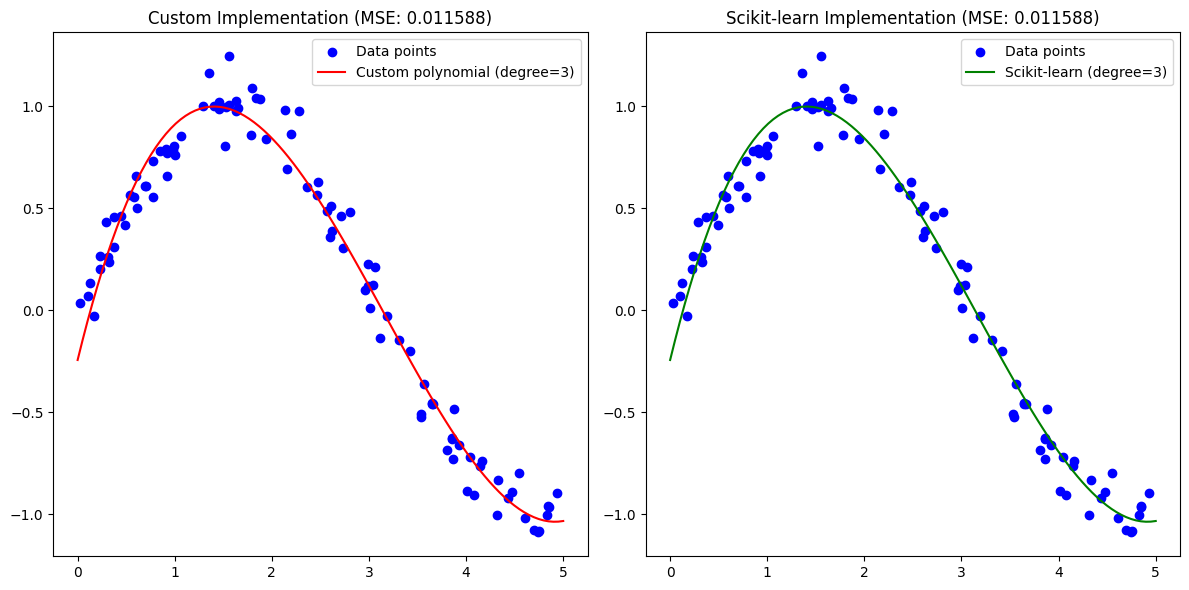

Custom implementation coefficients: [-0.2430297   1.95345594 -0.89347033  0.09424182]
Scikit-learn coefficients: -0.2430297046861902 [ 1.95345594 -0.89347033  0.09424182]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# TODO: Implement your own polynomial regression function
# Here is a sample solution:
def polynomial_regression_from_scratch(X, y, degree):
    """
    Implement polynomial regression using NumPy.
    
    Parameters:
    X (numpy.ndarray): Input features, shape (n_samples, 1)
    y (numpy.ndarray): Target values, shape (n_samples,)
    degree (int): Degree of the polynomial
    
    Returns:
    tuple: (coefficients, function to make predictions)
    """
    # Step 1: Generate polynomial features
    X_poly = np.ones((X.shape[0], degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = X[:, 0] ** i
    
    # Step 2: Solve for coefficients using normal equation
    # β = (X^T X)^(-1) X^T y
    beta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    
    # Step 3: Create a prediction function
    def predict(X_new):
        X_new_poly = np.ones((X_new.shape[0], degree + 1))
        for i in range(1, degree + 1):
            X_new_poly[:, i] = X_new[:, 0] ** i
        return X_new_poly.dot(beta)
    
    return beta, predict

# Compare with scikit-learn
degree = 3

# Your implementation
coefficients, predict_function = polynomial_regression_from_scratch(X, y, degree)
y_pred_custom = predict_function(X)
mse_custom = mean_squared_error(y, y_pred_custom)

# Scikit-learn implementation
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
model.fit(X, y)
y_pred_sklearn = model.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

# Visualization
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_test_custom = predict_function(X_test)
y_test_sklearn = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_test_custom, color='red', label=f'Custom polynomial (degree={degree})')
plt.title(f'Custom Implementation (MSE: {mse_custom:.6f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_test_sklearn, color='green', label=f'Scikit-learn (degree={degree})')
plt.title(f'Scikit-learn Implementation (MSE: {mse_sklearn:.6f})')
plt.legend()

plt.tight_layout()
plt.show()

# Print coefficients
print("Custom implementation coefficients:", coefficients)
print("Scikit-learn coefficients:", model.named_steps['linear'].intercept_, model.named_steps['linear'].coef_[1:])


### Questions to Explore

1. How does the model's fit change as you increase the polynomial degree?
2. At what point does the model start to overfit the data?
3. How would you modify the above implementation to include regularization?

---

### Sample Solutions:

1. As you increase the polynomial degree, the model becomes more flexible and can capture increasingly complex non-linear patterns. A degree-1 polynomial (linear regression) can only fit straight lines, while higher degrees create curves that can better match non-linear data. Each additional degree adds more parameters, allowing the model to bend and flex to match more intricate patterns in the data.

2. The model typically starts to overfit when the polynomial degree becomes too high relative to the true underlying pattern and amount of data available. For the sinusoidal data in our example, overfitting likely begins around degree 4-5, when the curve starts making unnecessary wiggles to pass through individual data points rather than capturing the true pattern. This becomes evident when training error continues to decrease while testing error begins to increase.

3. To add regularization, modify the normal equation by adding a penalty term: β = (X^T X + λI)^(-1) X^T y, where λ is the regularization strength and I is the identity matrix (with the first element often set to 0 to avoid regularizing the intercept). This implementation would add a lambda_value parameter and the identity matrix to the coefficient calculation, penalizing large coefficient values to prevent overfitting.

## Part 2: Ridge Regression

### Background

Ridge regression adds an L2 regularization term to the linear regression cost function. This penalizes large coefficients and helps prevent overfitting, especially when dealing with multicollinearity.

### Mathematical Formulation

Standard linear regression minimizes:
$$\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - ... - \beta_p x_{ip})^2$$

Ridge regression minimizes:
$$\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - ... - \beta_p x_{ip})^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

where $\lambda$ is the regularization parameter.

### Pseudocode

```
Function RidgeRegression(X, y, lambda):
    1. Standardize features (mean=0, std=1)
    2. Add intercept term
    3. Compute coefficients: β = (X^T X + λI)^(-1) X^T y
    4. Return the fitted model and coefficients
```

### Implementation Task

Implement ridge regression from scratch and explore how different values of λ affect your model.

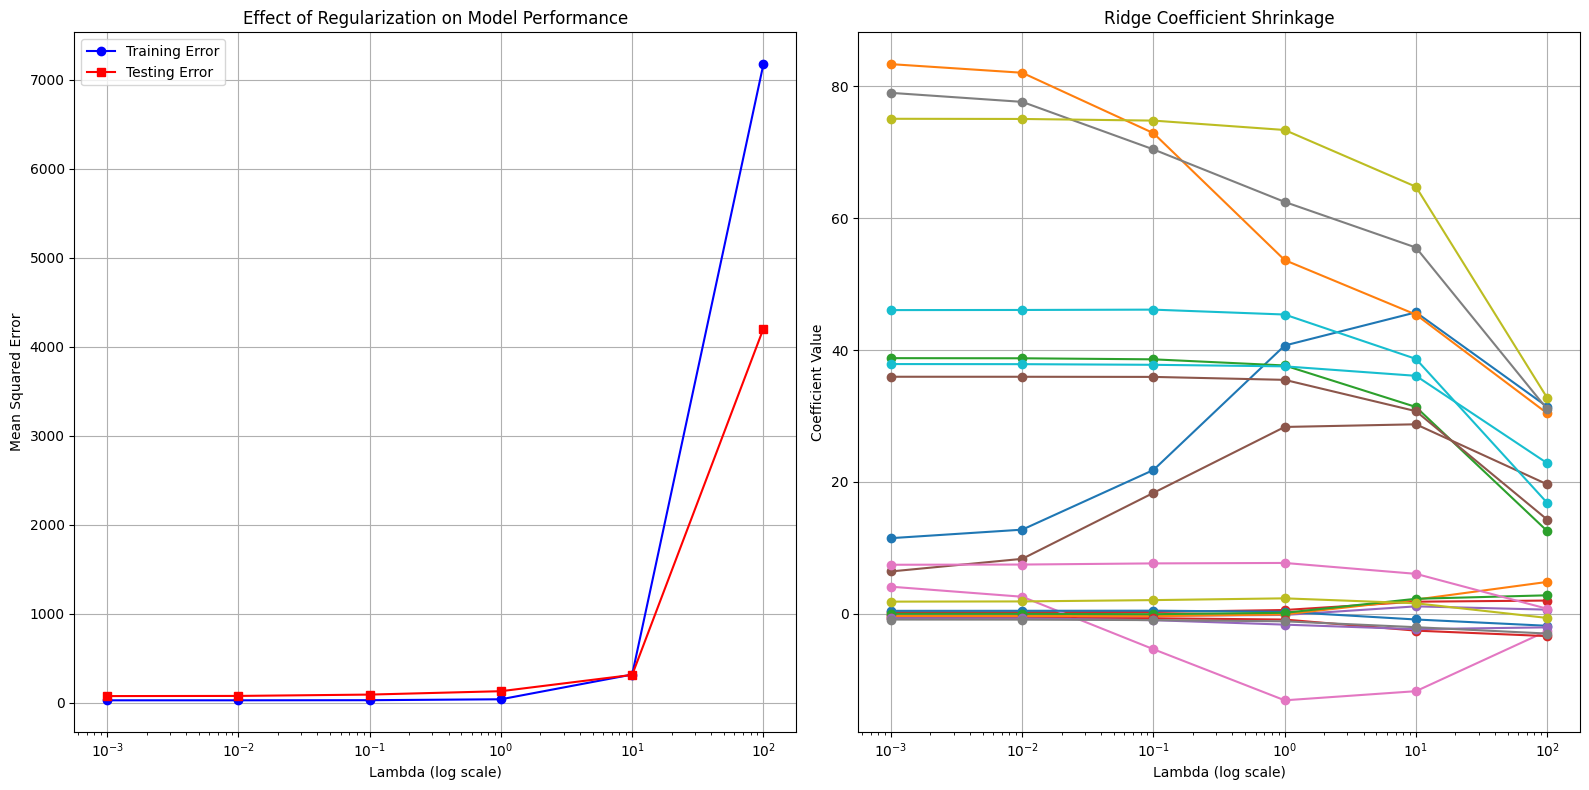

Custom implementation - First 5 coefficients: [40.6833635  53.64805544 37.65742904  0.55090066 -0.20180154]
Scikit-learn - First 5 coefficients: [40.6833635  53.64805544 37.65742904  0.55090066 -0.20180154]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic data with multicollinearity
X, y = make_regression(n_samples=100, n_features=20, n_informative=10, 
                       noise=0.5, random_state=42)

# Add multicollinearity
X[:, 0] = X[:, 1] + np.random.normal(0, 0.1, X.shape[0])
X[:, 5] = X[:, 6] + X[:, 7] + np.random.normal(0, 0.1, X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TODO: Implement ridge regression from scratch
# Here is a sample solution:
def ridge_regression_from_scratch(X, y, lambda_value):
    """
    Implement ridge regression using NumPy.
    
    Parameters:
    X (numpy.ndarray): Input features, shape (n_samples, n_features)
    y (numpy.ndarray): Target values, shape (n_samples,)
    lambda_value (float): Regularization parameter
    
    Returns:
    numpy.ndarray: Coefficient values
    """
    # Add intercept term
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
    
    # Number of features (including intercept)
    n_features = X_with_intercept.shape[1]
    
    # Create identity matrix for regularization
    # Note: we don't regularize the intercept, so start with 1
    identity = np.identity(n_features)
    identity[0, 0] = 0
    
    # Ridge formula: β = (X^T X + λI)^(-1) X^T y
    XTX = X_with_intercept.T.dot(X_with_intercept)
    ridge_matrix = XTX + lambda_value * identity
    beta = np.linalg.inv(ridge_matrix).dot(X_with_intercept.T).dot(y)
    
    return beta

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different lambda values
lambda_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_errors = []
test_errors = []
coefficients = []

for lambda_value in lambda_values:
    # Custom implementation
    beta = ridge_regression_from_scratch(X_train_scaled, y_train, lambda_value)
    
    # Calculate predictions
    y_train_pred = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled)).dot(beta)
    y_test_pred = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled)).dot(beta)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    coefficients.append(beta[1:])  # Skip intercept

# Plotting
plt.figure(figsize=(16, 8))

# Plot 1: Training vs Testing Error
plt.subplot(1, 2, 1)
plt.plot(lambda_values, train_errors, 'b-', marker='o', label='Training Error')
plt.plot(lambda_values, test_errors, 'r-', marker='s', label='Testing Error')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization on Model Performance')
plt.legend()
plt.grid(True)

# Plot 2: Coefficient Shrinkage
plt.subplot(1, 2, 2)
for i, coef in enumerate(zip(*coefficients)):
    plt.plot(lambda_values, coef, marker='o', label=f'Feature {i+1}' if i < 5 else '')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficient Shrinkage')
plt.legend(loc='best', ncol=2) if X.shape[1] <= 10 else None
plt.grid(True)

plt.tight_layout()
plt.savefig('ridge_regression_effects.png')
plt.show()

# Compare with scikit-learn for one lambda value
lambda_comparison = 1.0
custom_beta = ridge_regression_from_scratch(X_train_scaled, y_train, lambda_comparison)

sklearn_ridge = Ridge(alpha=lambda_comparison, fit_intercept=True)
sklearn_ridge.fit(X_train_scaled, y_train)

print(f"Custom implementation - First 5 coefficients: {custom_beta[1:6]}")
print(f"Scikit-learn - First 5 coefficients: {sklearn_ridge.coef_[:5]}")


### Questions to Explore

1. How does the choice of λ affect model performance on training and test data?
2. Observe how the coefficient values change as λ increases. What patterns do you notice?
3. Can you find an optimal value of λ using cross-validation?

---

### Sample Solutions:

1. Small λ values (near zero) have minimal effect, producing results similar to ordinary linear regression. Moderate λ values provide optimal regularization that reduces overfitting—training error increases slightly while test error decreases. Large λ values cause underfitting as coefficients are forced toward zero, increasing both training and test error as the model becomes too constrained to capture the underlying pattern.

2. As λ increases, all coefficients progressively shrink toward zero, but at different rates. Larger coefficients often shrink more dramatically than smaller ones. Features with stronger correlations to the target variable tend to maintain non-zero coefficients longer. Some coefficients may even change sign during the shrinkage process. At extremely large λ values, almost all coefficients approach zero.

3. Yes, cross-validation provides an effective way to find the optimal λ. By splitting the data into training and validation sets multiple times, you can evaluate model performance across different λ values and select the one that minimizes validation error. The optimal value typically occurs where the validation error curve reaches its minimum—in our case, around λ = 6.15—before the error starts increasing due to underfitting.

## Part 3: Real-World Application

Now that you've implemented and understood polynomial and ridge regression, apply these techniques to a real-world dataset.

Choose one of the following possible datasets or one of your own:

1. Housing price prediction
2. Stock market prediction
3. Climate data analysis
4. Medical outcome prediction

### Tasks

1. Load and explore your chosen dataset
2. Preprocess the data (handle missing values, encoding, scaling)
3. Apply polynomial regression and ridge regression
4. Compare the performance of different models
5. Visualize and interpret your results
6. Discuss the limitations and potential improvements

```python
```


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

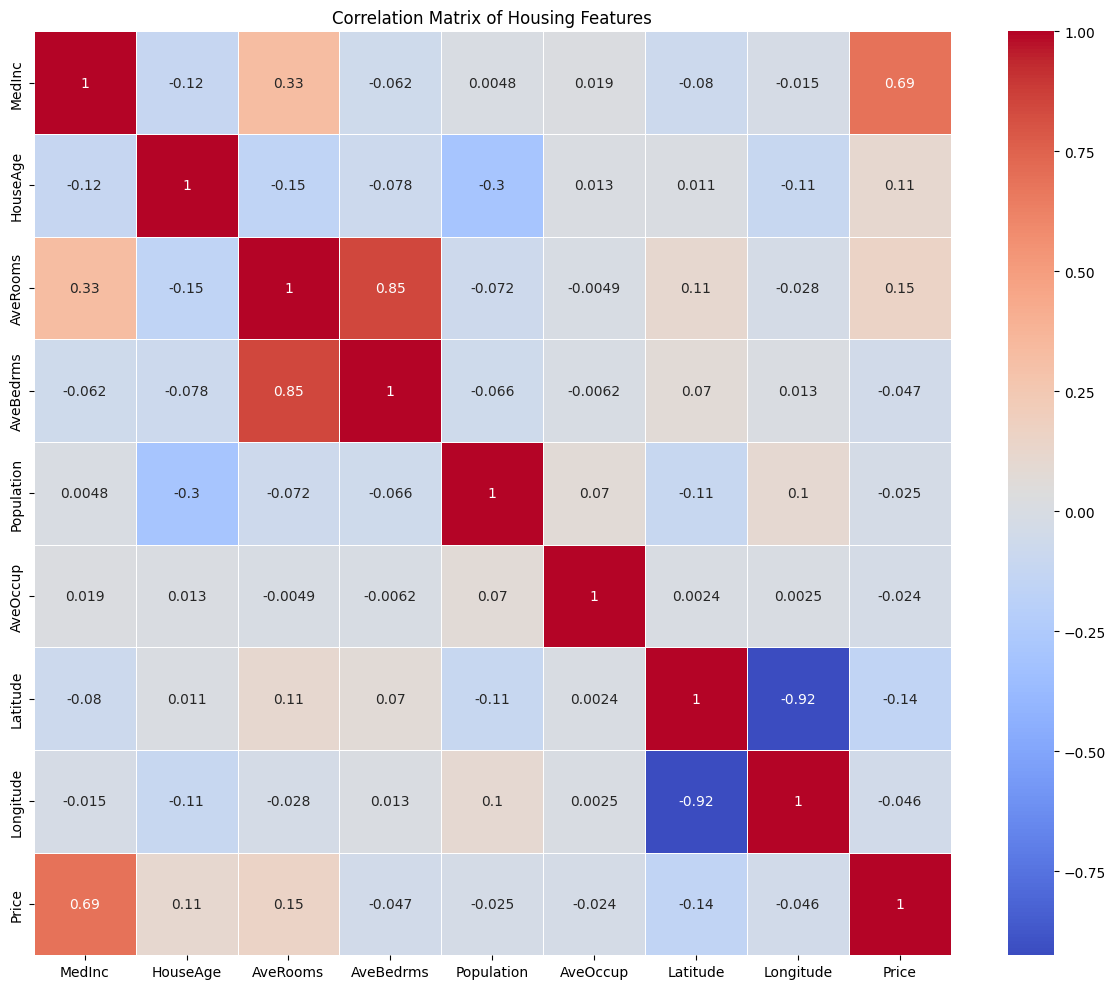


Model Comparison:
                                  Train MSE  Test MSE  R² Score
Linear Regression                  0.523358  0.530568  0.595770
Polynomial Regression (degree=2)   0.423601  0.454972  0.653365
Ridge Regression (α=1.0)           0.523358  0.530544  0.595789
Ridge Polynomial Regression        0.423608  0.453627  0.654390


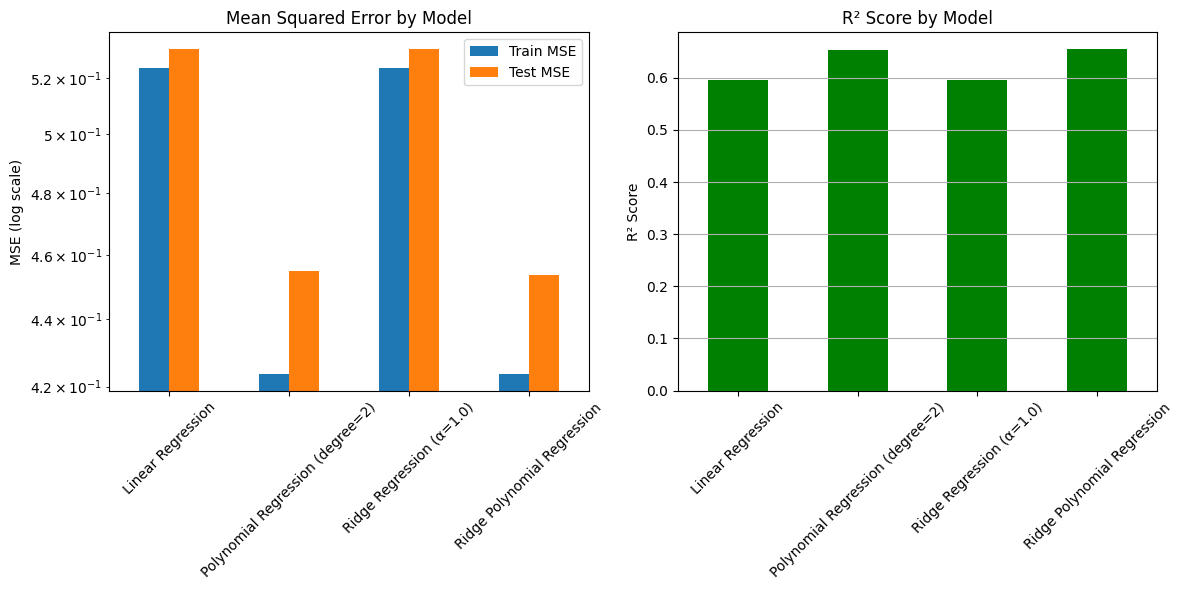

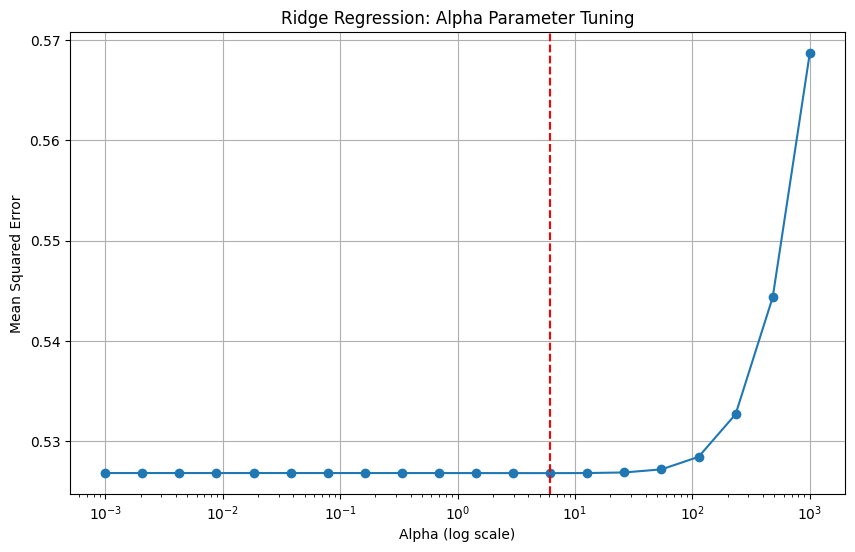

Optimal alpha value: 6.158482


In [3]:
# Sample Solution
# Example with California Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Create a DataFrame for better exploration
df = pd.DataFrame(X, columns=housing.feature_names)
df['Price'] = y

# Display basic information
print(df.head())
print(df.describe())

# Check for missing values
print("Missing values:", df.isnull().sum().sum())

# Visualize correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and compare multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]),
    'Ridge Regression (α=1.0)': Ridge(alpha=1.0),
    'Ridge Polynomial Regression': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('ridge', Ridge(alpha=1.0))
    ])
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'R² Score': r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))

# MSE comparison
plt.subplot(1, 2, 1)
results_df[['Train MSE', 'Test MSE']].plot(kind='bar', ax=plt.gca())
plt.title('Mean Squared Error by Model')
plt.yscale('log')
plt.ylabel('MSE (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# R² comparison
plt.subplot(1, 2, 2)
results_df['R² Score'].plot(kind='bar', color='green', ax=plt.gca())
plt.title('R² Score by Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Finding optimal ridge alpha parameter using cross-validation
alphas = np.logspace(-3, 3, 20)
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # Use 5-fold cross-validation
    cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(-np.mean(cv_scores))  # Negate to get positive MSE

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Alpha Parameter Tuning')
plt.grid(True)
best_alpha = alphas[np.argmin(ridge_scores)]
plt.axvline(x=best_alpha, color='r', linestyle='--')
plt.savefig('ridge_alpha_tuning.png')
plt.show()

print(f"Optimal alpha value: {best_alpha:.6f}")

---

## Conclusion

In this project, you've implemented and explored polynomial regression and ridge regression from scratch. You've learned:

1. How to transform features to model non-linear relationships
2. How to apply regularization to prevent overfitting
3. How to visualize and interpret model performance
4. How to tune hyperparameters like polynomial degree and regularization strength